# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, HuberRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_digits, load_iris, load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Linear Regression
Predicting a continous value based on a single input value
- Utilises a linear function: $ y = m*x + b $
    - `y = target value`
    - `m = slope `
    - `x = argument` 
    - `b = interception with y-axis`

## Cost Function

We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.

\begin{equation}
J(\boldsymbol{\theta}) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m J^{(i)}(\boldsymbol{\theta}) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}^{(i)}- y^{(i)} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_{\boldsymbol{\theta}} (x^{(i)}) - y^{(i)} \right)^2
\end{equation}

In [2]:
path = os.path.join("data_for_ilsturation", "linear_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# explore the data
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


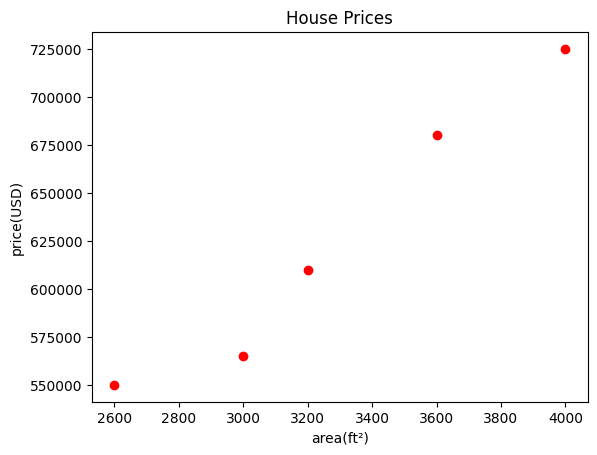

In [3]:
# explore data visually
plt.xlabel("area(ft²)")
plt.ylabel("price(USD)")
plt.title("House Prices")
plt.scatter(df.area, df.price, color = "red")

In [4]:
# initializing the model
model = LinearRegression()
# pass data and train the mode
# the "values" method omits the header of the dataframe
model.fit(df[["area"]].values, df.price)

LinearRegression()

y = m * x + b
y = (135.78767123287673)  x + 180616.43835616432


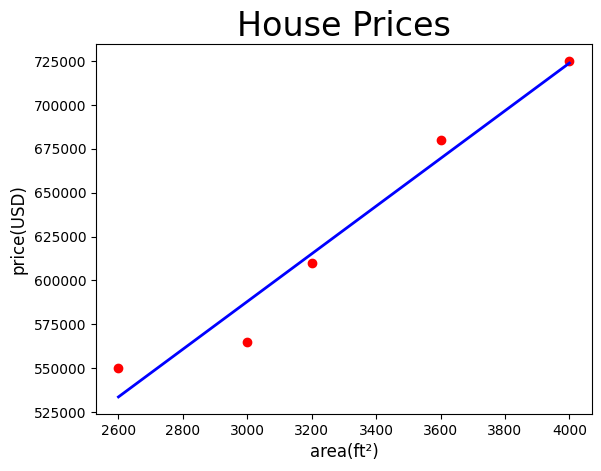

In [5]:
# display function graph (y = m*x + b) with the minimal distance to all samples, 
print("y = m * x + b")
print(f"y = ({model.coef_[0]})  x + {model.intercept_}")
plt.xlabel("area(ft²)", fontsize=12)
plt.ylabel("price(USD)", fontsize=12)
plt.title("House Prices", fontsize=24)
plt.scatter(df.area, df.price, color = "red")
plt.plot(df.area, model.predict(df[["area"]].values), color = "blue", linewidth = 2)

# Multivariable Linear Regression

Predicting a continous value based on multiple input values
- Utilises a function of this shape: $ y = m1*x1 + m2*x2 + m3*x3 + ... + b $
    - `y = target value`
    - `m = factors`
    - `x = arguments` 
    - `b = interception with y-axis`

In [6]:
path = os.path.join("data_for_ilsturation", "multivariate_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display the numeric data
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,596000
4,4000,5.0,8,760000


In [7]:
# handling NaN by the median
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,596000
4,4000,5.0,8,760000


Text(0.5, 0.98, 'House Prices')

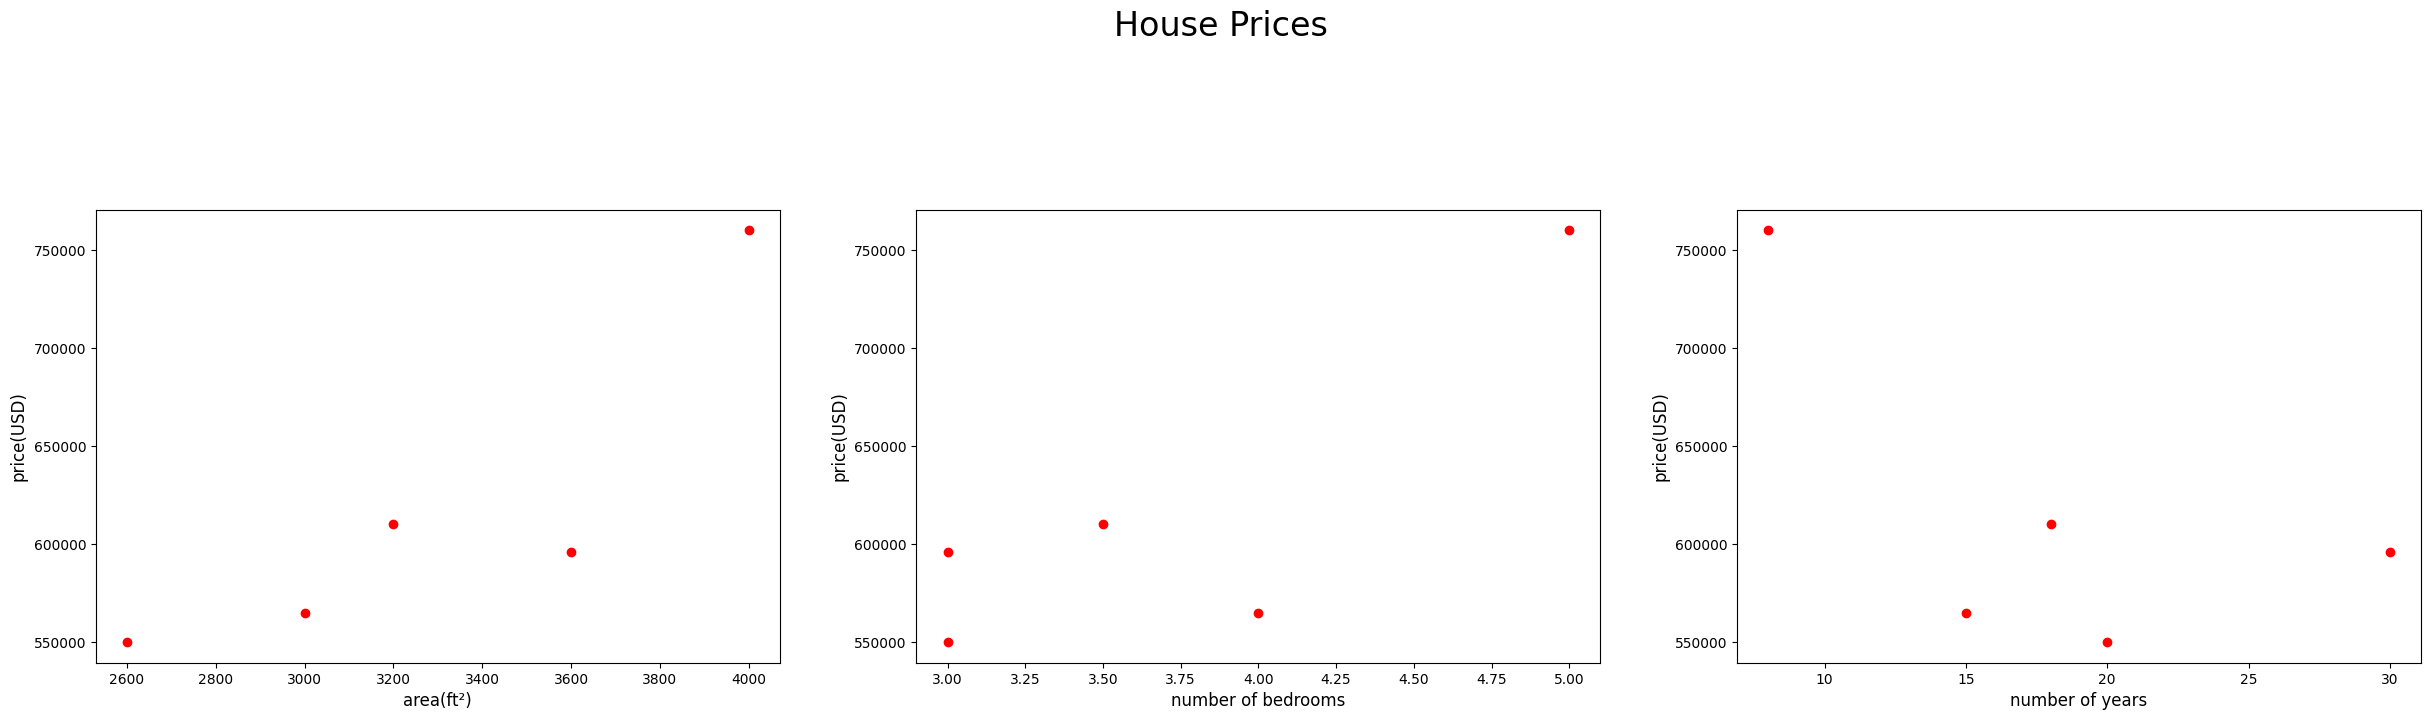

In [8]:
plt.figure(figsize=(30,20))
# explore data visually
plt.subplot(3,3, 1)
plt.xlabel("area(ft²)", fontsize=12)
plt.ylabel("price(USD)", fontsize=12)
plt.scatter(df['area'], df.price, color = "red")

plt.subplot(3,3, 2)
plt.xlabel("number of bedrooms", fontsize=12)
plt.ylabel("price(USD)", fontsize=12)
plt.scatter(df['bedrooms'], df.price, color = "red")

plt.subplot(3,3, 3)
plt.xlabel("number of years", fontsize=12)
plt.ylabel("price(USD)", fontsize=12)
plt.scatter(df['age'], df.price,  color = "red")

plt.suptitle("House Prices", fontsize=24)

In [9]:
# initializing the model
model = LinearRegression()
# passing the independent variables (x1, x2, x3) to the model and start training 
# price (dependent variable) = m1*area + m2*bedrooms + m3*age + b
# b = interception with y-axis 
model.fit(df[["area", "bedrooms", "age"]], df.price)

LinearRegression()

In [10]:
# displaying m1, m2, m3 and interception with y-axis
print(f'({model.coef_[0]}) x1 + ({model.coef_[1]}) x2 + ({model.coef_[2]}) x3 + {model.intercept_}')

(198.56145032177054) x1 + (-116060.58703500242) x2 + (-14172.186469941924) x3 + 652276.4087270447


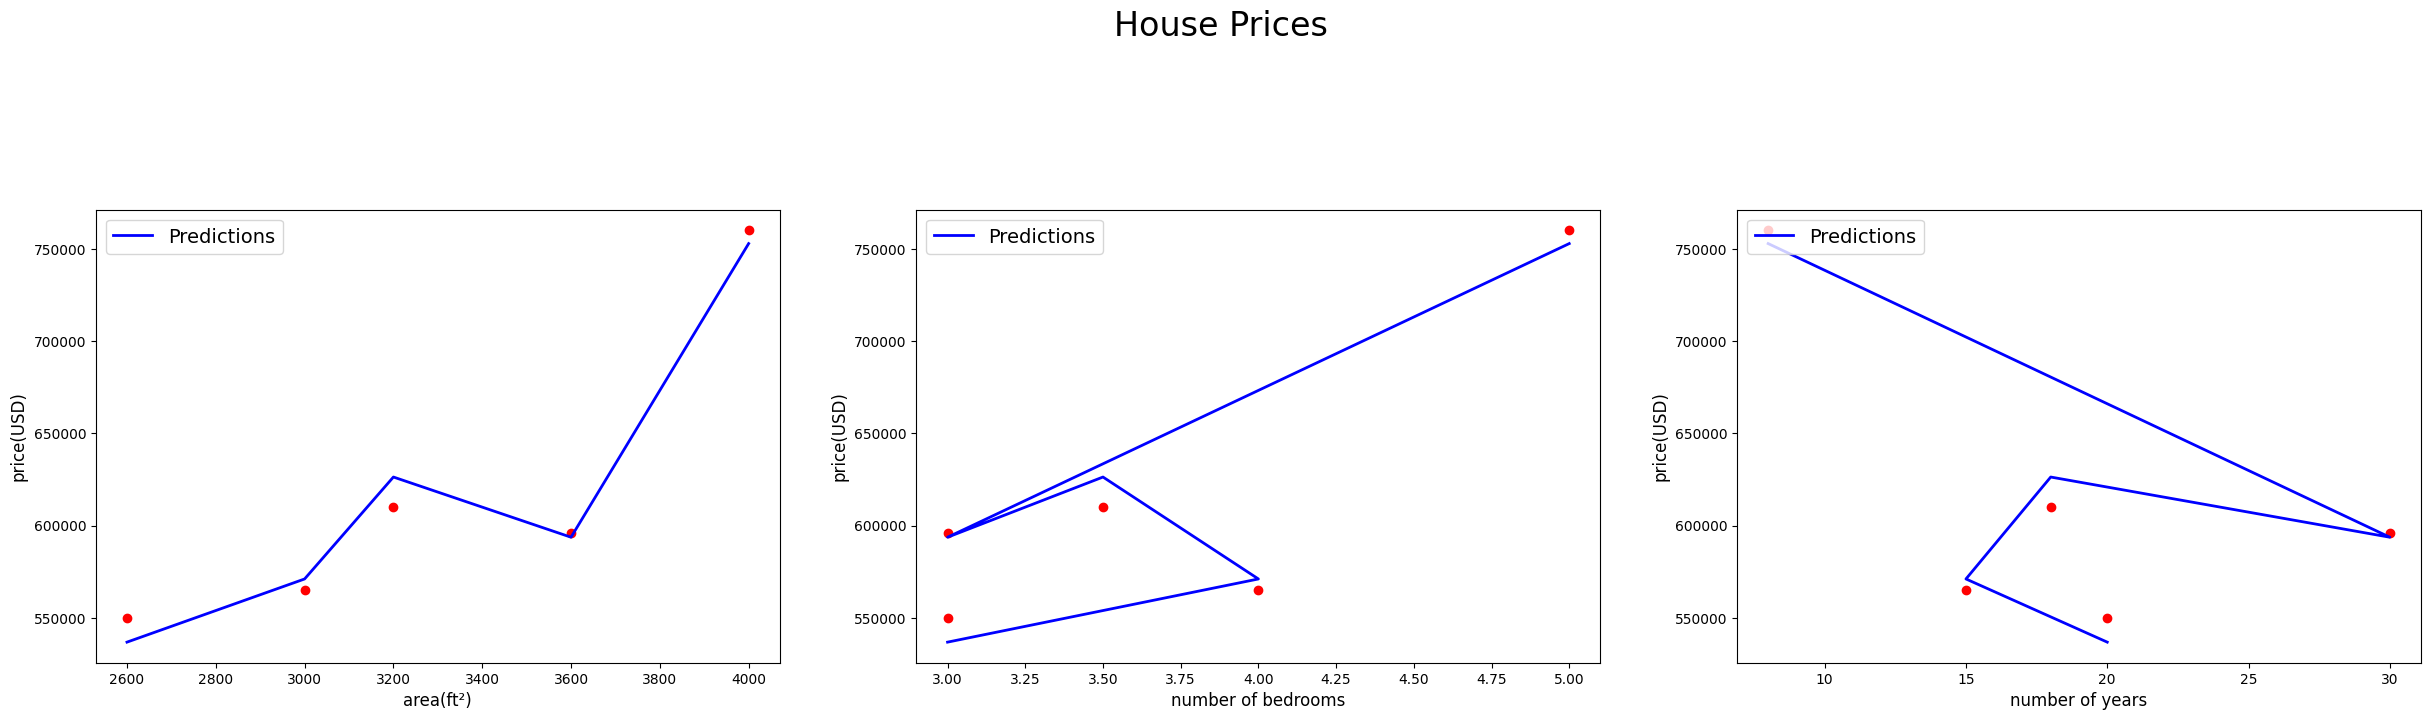

In [11]:
plt.figure(figsize=(30,20))
# explore data visually
plt.subplot(3,3, 1)
plt.xlabel("area(ft²)",fontsize=12)
plt.ylabel("price(USD)",fontsize=12)
plt.scatter(df['area'], df.price, color = "red")
plt.plot(df['area'], model.predict(df.drop(['price'], axis=1)) , color = "blue", linewidth = 2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)

plt.subplot(3,3, 2)
plt.xlabel("number of bedrooms",fontsize=12)
plt.ylabel("price(USD)", fontsize=12)
plt.scatter(df['bedrooms'], df.price, color = "red")
plt.plot(df['bedrooms'], model.predict(df.drop(['price'], axis=1)) , color = "blue", linewidth = 2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)

plt.subplot(3,3, 3)
plt.xlabel("number of years", fontsize=12)
plt.ylabel("price(USD)", fontsize=12)
plt.scatter(df['age'], df.price, color = "red")
plt.plot(df['age'], model.predict(df.drop(['price'], axis=1)) , color = "blue", linewidth = 2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)

plt.suptitle("House Prices", fontsize=24)
plt.show()

# Gradient Descent
Updating the cofficents of x in the direction that decreses the loss function
- Utilises a function : $ θ = θ - α * ∇J (θ) $

- where $ ∇J (θ) $ is defined as:

    $\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

    - `θ         = the parameters of the model`
    - `α (alpha) = the learning rate, which determines the step size at each iteration`
    - `∇J(θ)     = the gradient of the cost function J with respect to θ` 

In [21]:
# we will generate a dataset comes from normal disterbution with 100 samples to visualize the mechanism behind gradient descent
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

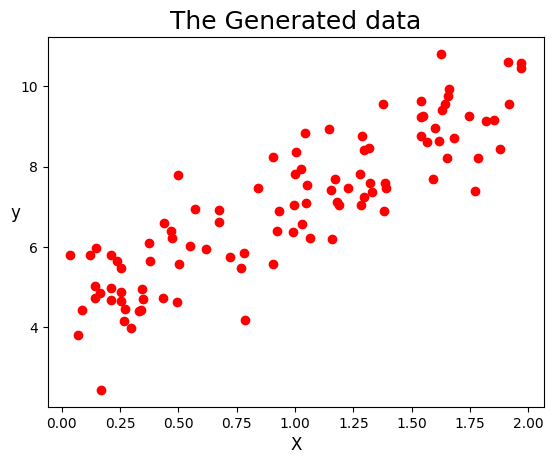

In [17]:
# explore data visually
plt.scatter(X, y, color = "red")
plt.xlabel("X", fontsize=12)
plt.ylabel("y", rotation=0, fontsize=12)
plt.title('The Generated data', fontsize=18)
plt.show()

In [23]:
# initializing the model
model = LinearRegression()
# pass data and train the mode
model.fit(X, y)
# printing the cofficent and intercepting part
print(f"y = {model.coef_[0][0]}  x + {model.intercept_[0]}")

y = 2.7735280893368603  x + 4.291208967601907


In [24]:
def plot_fitting_line(X, y, m, c):
    '''
    this function plots the data vs the best fitting line 
    params:
        X:(np.int32) the data points
        y = the target points
        m = the cofficient of x
        c = the intercepting part of y
    
    '''
    # creating the fitting line for plotting
    X_new = np.array([[0], [2]])
    y_predict = X_new.dot(m) + c
    
    # plottint the data vs the best line fit
    plt.scatter(X, y, color = "red")
    plt.plot(X_new, y_predict ,'-' ,color = "blue", linewidth = 2, label="Best Line")
    plt.xlabel("X", fontsize=12)
    plt.ylabel("y", rotation=0, fontsize=12)
    plt.title('The Generated data', fontsize=18)
    plt.legend(loc="upper left", fontsize=14)
    plt.show()

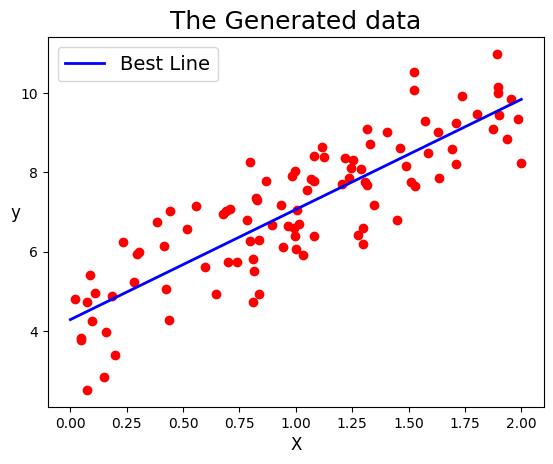

In [25]:
plot_fitting_line(X, y, model.coef_[0][0], model.intercept_[0])

### Batch Gradient Desent

In [26]:
eta = 0.1  # learning rate
n_iterations = 1000
m = len(X)

theta = np.random.randn(2,1)        # random initialization
X_b = np.c_[np.ones((100, 1)), X]   # adding new column for biases

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print(f'the parameters of the model = {theta.T}')

the parameters of the model = [[4.29120897 2.77352809]]


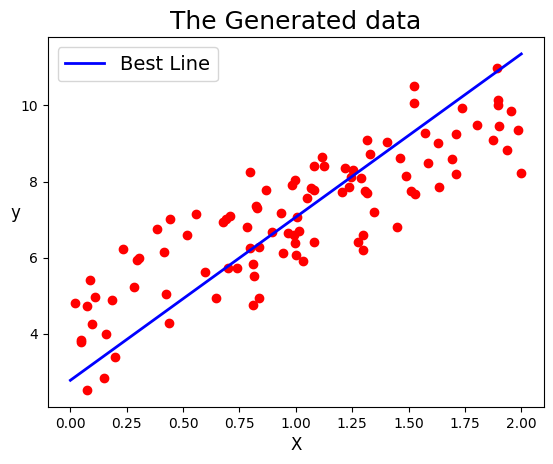

In [27]:
plot_fitting_line(X, y, theta[0], theta[1])

In [40]:
def plot_gradient_descent(X,y, eta, theta_path= None):
    '''
    this function plots the updates of the first 10 iterations of gradient descent vs data
    params:
        X = the data points
        y = the target points
        eta = the learning rate
    '''
    np.random.seed(42)
    theta = np.random.randn(2,1)  # random initialization
    m = len(X)
    plt.plot(X, y, "r.")
    n_iterations = 50
    X_b = np.c_[np.ones((100, 1)), X]   # adding new column for biases

    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_b.dot(theta)
            if iteration > 0 :
                plt.plot(X, y_predict, 'b-')
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("X", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(f"eta = {eta}", fontsize=16)

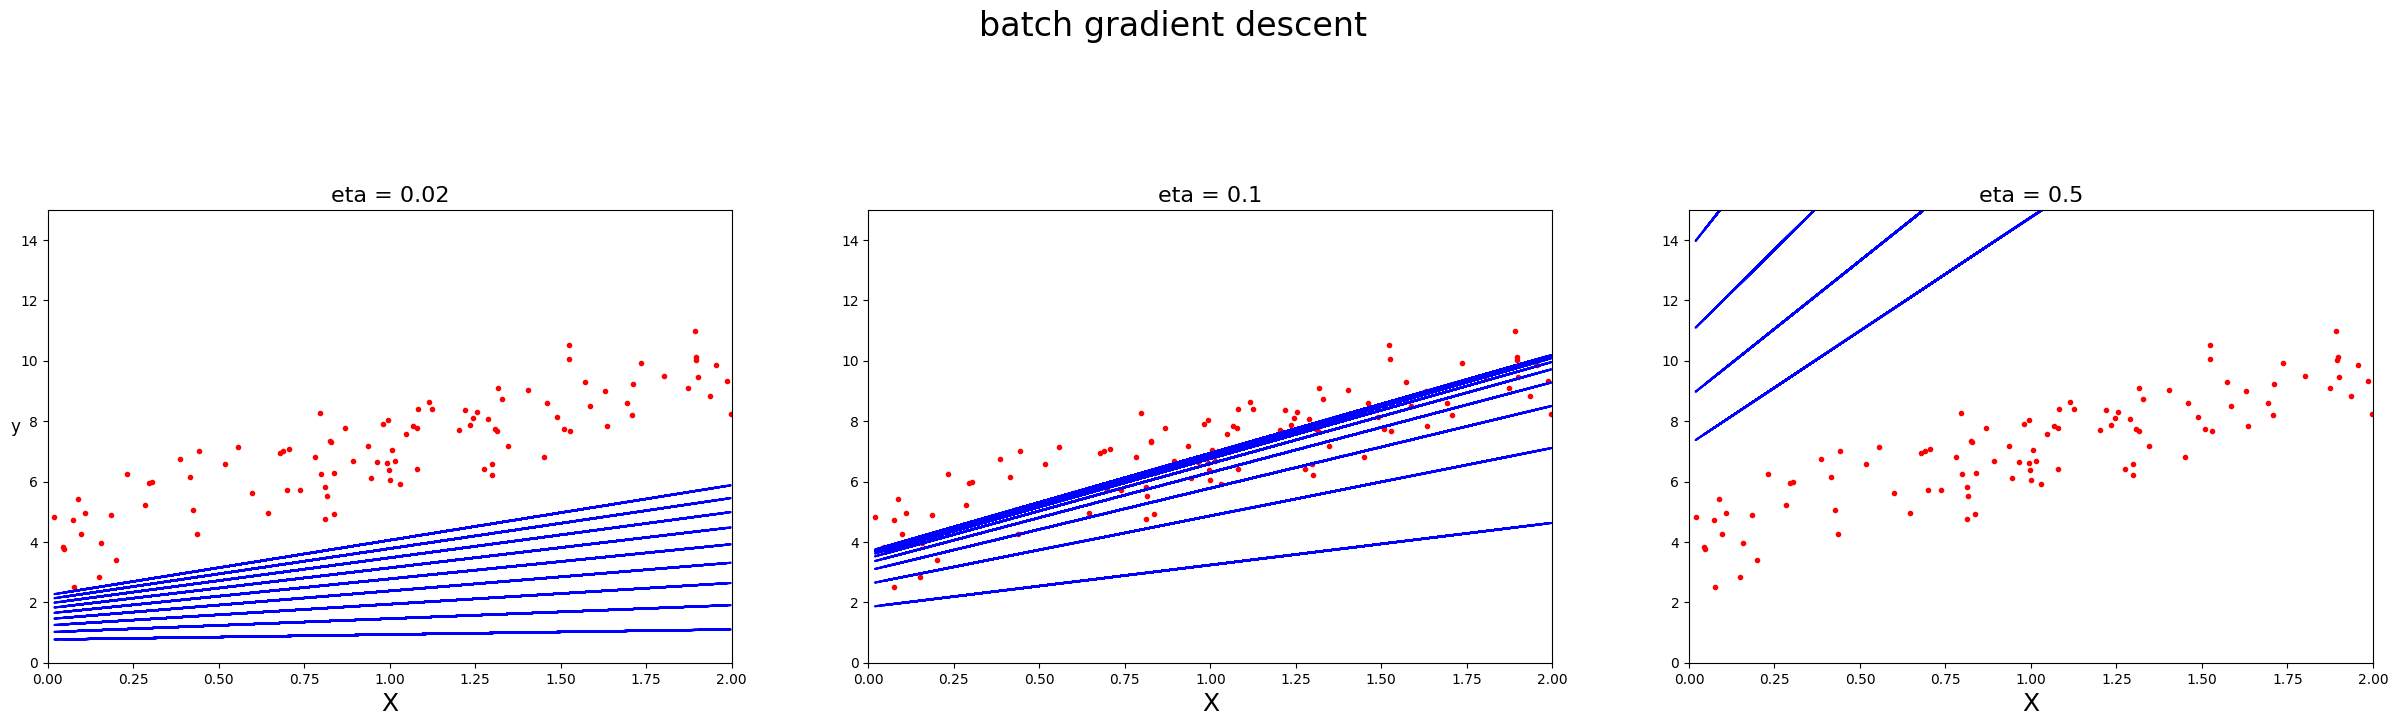

In [41]:
# plotting the updates of the gradient descent 
theta_path_bgd = []
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
plot_gradient_descent(X,y, eta=0.02)
plt.ylabel("y", rotation=0, fontsize=12)
plt.subplot(3,3,2)
plot_gradient_descent(X,y, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(3,3,3)
plot_gradient_descent(X,y, eta=0.5)
plt.suptitle('batch gradient descent',  fontsize=24)

plt.show()

In [30]:
print(f'the parameters of the batch model = {theta_path_bgd[-1].T}')

the parameters of the batch model = [[4.24473807 2.8132661 ]]


### Stochastic Gradient Descent

In [42]:
def learning_schedule(t, eta):
    return 1 / (t + (1/eta))

def plot_batch_gradient_descent(X,y, eta, batch_size, theta_path = None, random_seed = 42):
    '''
    this function plots the updates of the first 20 iterations of mini-batch gradient descent vs data
    params:
        X       = the data points
        y       = the target points
        eta     = the learning rate
        batch_size = the batch size of the training dataset ie) assign to 1 for stocastic
    '''
    np.random.seed(random_seed)
    m = len(X)
    n_epochs = 50
    theta = np.random.randn(2,1)  # random initialization
    eta0 = eta
    X_b = np.c_[np.ones((100, 1)), X]   # adding new column for biases

    for epoch in range(n_epochs):
        for i in range(m):
            if epoch == 0 and i < 20:
                #print(f"theta = {theta.T}")                    
                y_predict = X_b.dot(theta)          
                if i > 0 :
                    plt.plot(X, y_predict, 'b-')
            random_index = np.random.randint(0,m,(batch_size,1))[0]
            xi = X_b[random_index]
            yi = y[random_index]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i, eta0)
            theta = theta - eta * gradients
            if theta_path is not None:
                theta_path.append(theta)
    plt.plot(X, y, "r.")                               
    plt.xlabel("X", fontsize=18)                
    plt.ylabel("y", fontsize=18)           
    plt.axis([0, 2, 0, 15])
    plt.title(f"batch_size = {batch_size}  eta = {eta0}", fontsize=16)                             

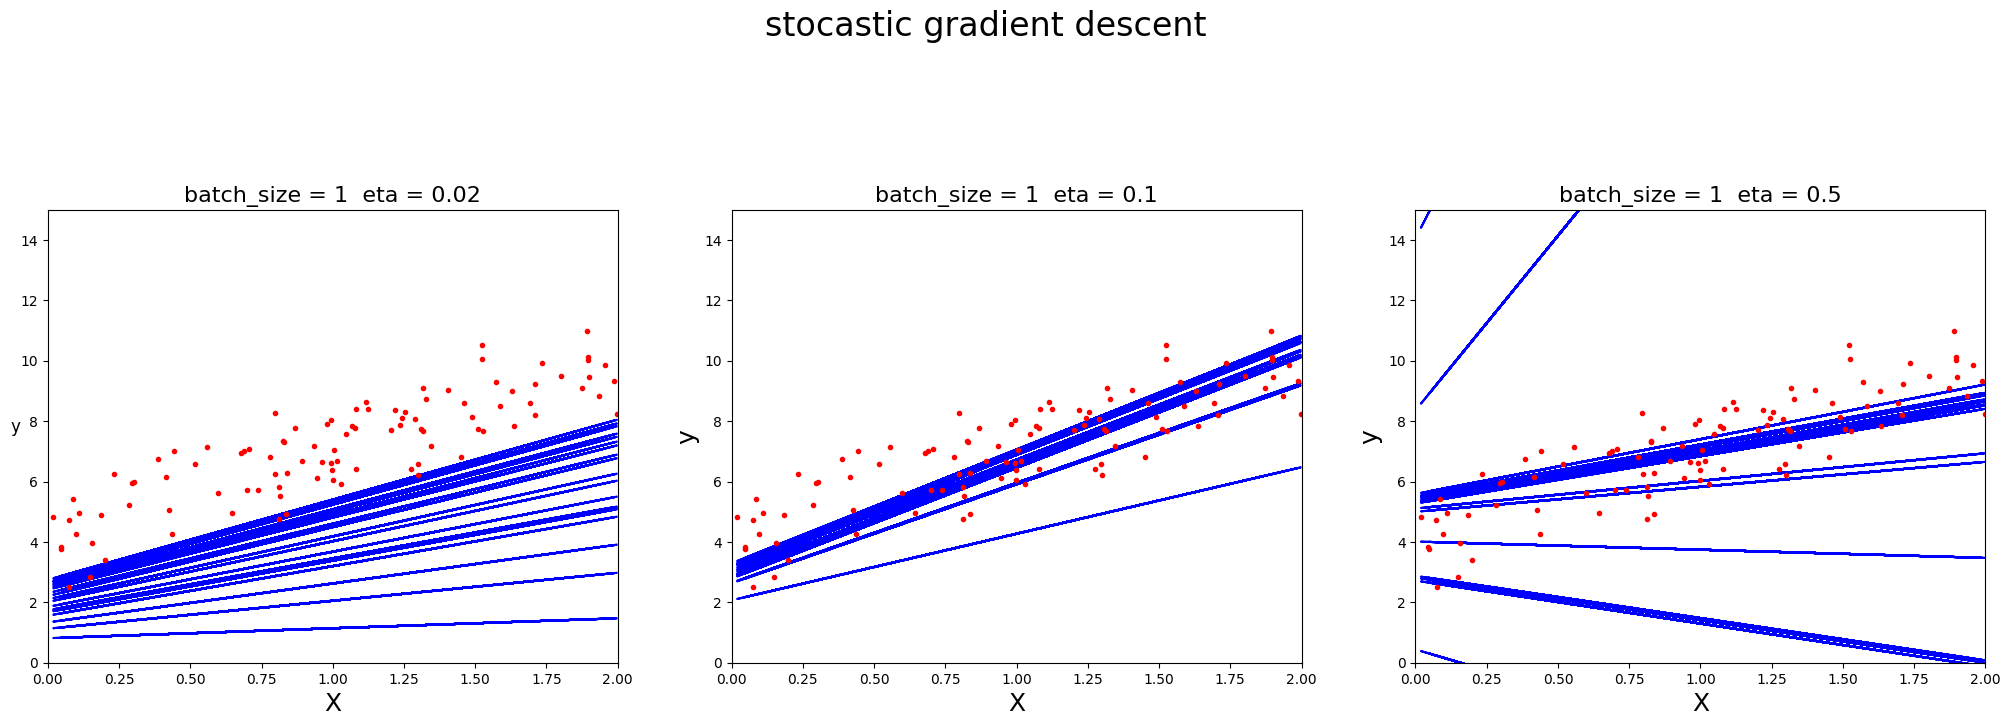

In [43]:
# plotting the updates of the stocastic gradient descent
theta_path_sgd = []
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
plot_batch_gradient_descent(X,y, eta = 0.02, batch_size = 1)
plt.ylabel("y", rotation=0, fontsize=12)
plt.subplot(3,3,2)
plot_batch_gradient_descent(X,y, eta = 0.1, batch_size = 1, theta_path=theta_path_sgd)
plt.subplot(3,3,3)
plot_batch_gradient_descent(X,y, eta = 0.5, batch_size = 1)
plt.suptitle('stocastic gradient descent',  fontsize=24)
plt.show()

In [33]:
print(f'the parameters of the stocastic model = {theta_path_sgd[-1].T}')

the parameters of the stocastic model = [[4.11765789 2.92201677]]


In [34]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
print(f'the parameters of the model = {sgd_reg.intercept_}, {sgd_reg.coef_}')

the parameters of the model = [4.28025623], [2.80624421]


### Mini-batch gradient descent

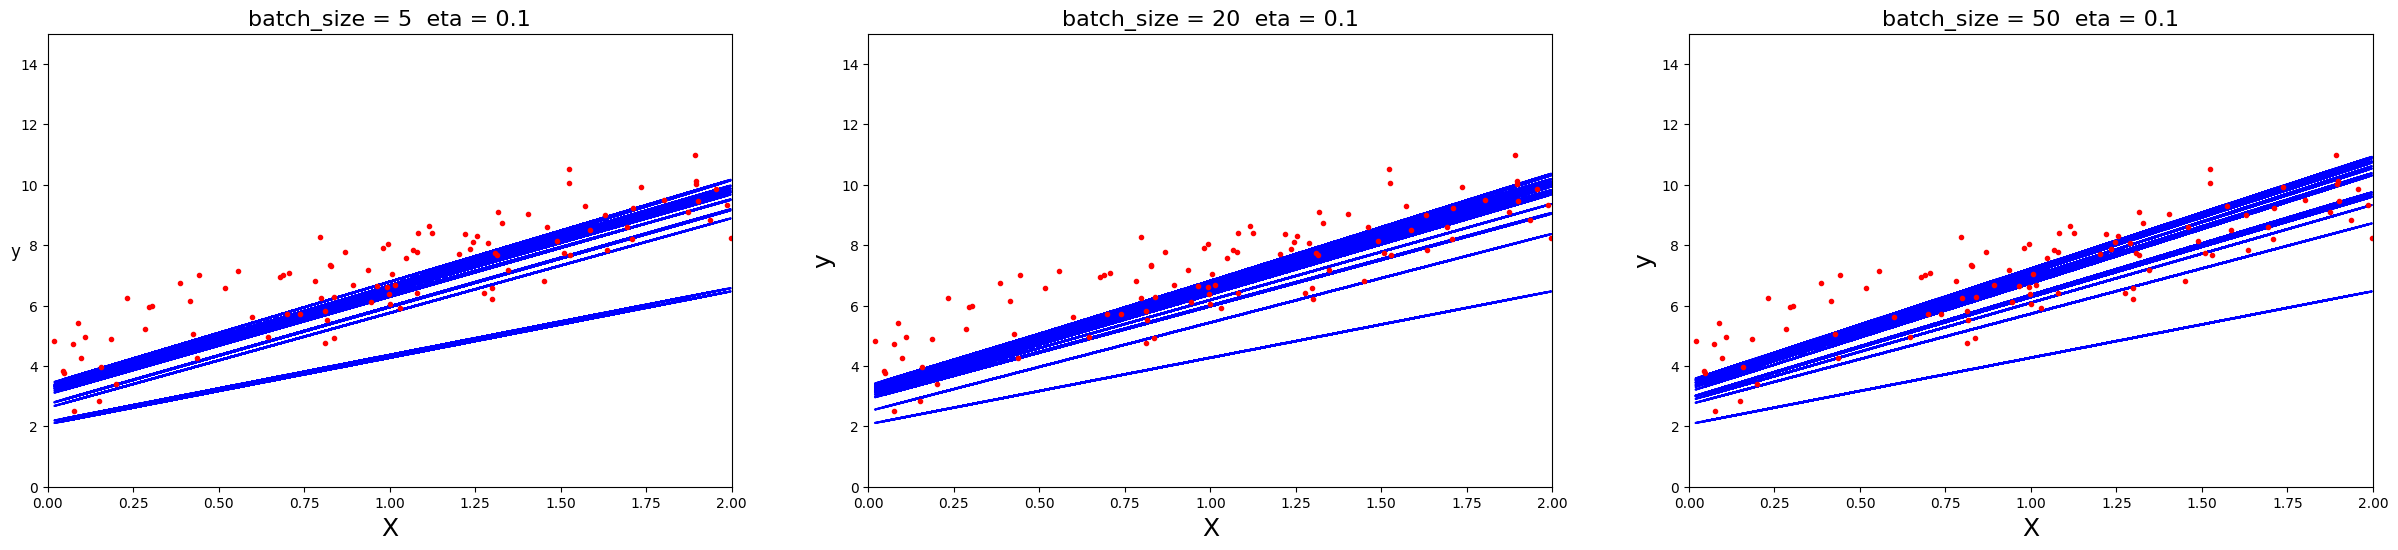

In [44]:
# plotting the updates of the stocastic gradient descent
theta_path_mgd = []
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
plot_batch_gradient_descent(X,y, eta = 0.1, batch_size = 5)
plt.ylabel("y", rotation=0, fontsize=12)
plt.subplot(3,3,2)
plot_batch_gradient_descent(X,y, eta = 0.1, batch_size = 20, theta_path=theta_path_mgd)
plt.subplot(3,3,3)
plot_batch_gradient_descent(X,y, eta = 0.1, batch_size = 50)
plt.show()

In [36]:
print(f'the parameters of the mini batch model = {theta_path_mgd[-1].T}')

the parameters of the mini batch model = [[4.133644  2.9038712]]


In [45]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [38]:
len(theta_path_sgd)

10000

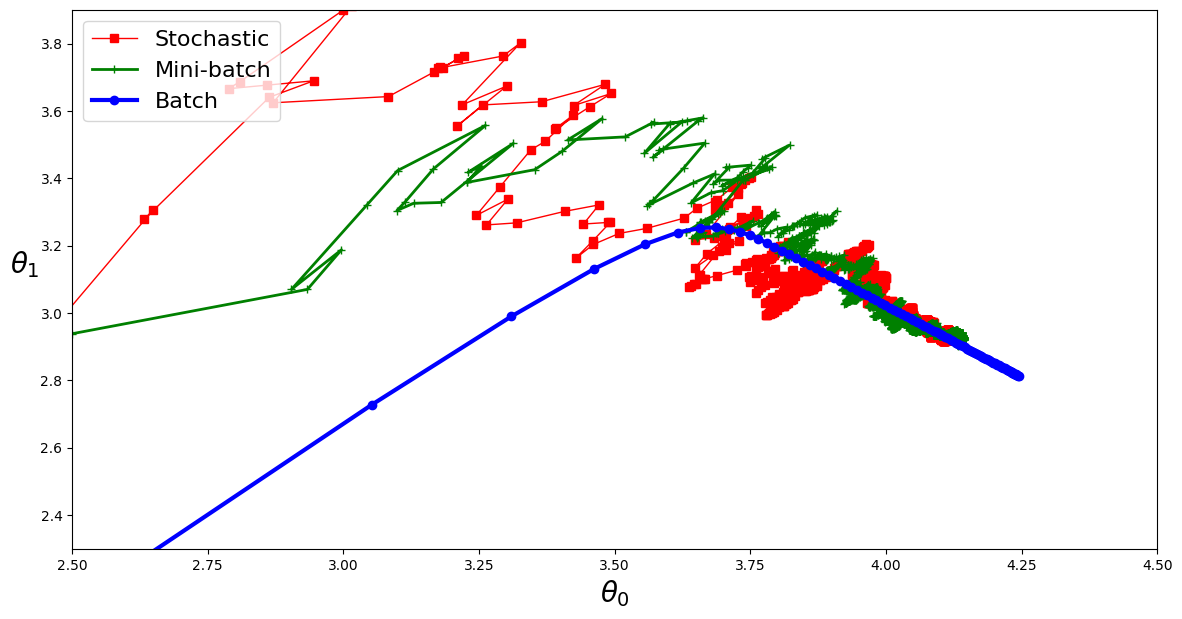

In [39]:
plt.figure(figsize=(14,7))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polynomial Regression

Predicting a continous value based on multiple input values
- Utilises a function of this shape: $ y = b0 + b1x + b2x^2 + ... + bnx^n $
    - `y = target value`
    - `x = arguments` 
    - `b0, b1, b2, .., bn = the coefficients of the polynomial equation`

In [47]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [48]:
# we will generate a quadratic dataset comes from normal disterbution with 100
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

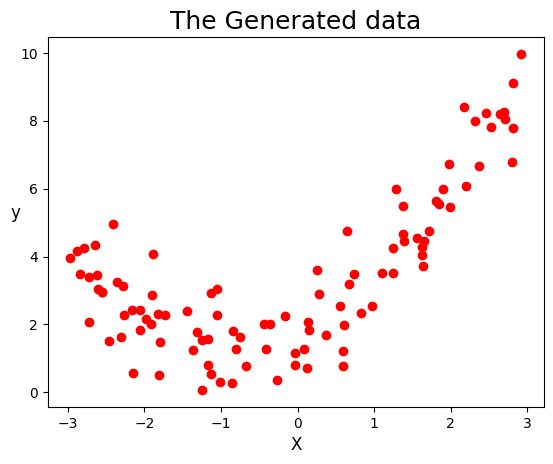

In [49]:
# explore data visually
plt.scatter(X, y, color = "red")
plt.xlabel("X", fontsize=12)
plt.ylabel("y", rotation=0, fontsize=12)
plt.title('The Generated data', fontsize=18)
plt.show()

In [50]:
from sklearn.preprocessing import PolynomialFeatures
# fitting x to a 2nd degree polynomial function
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)
print(f'a sample from the dataset before transformation and after {X[0]}  --- > {X_poly[0]}')

a sample from the dataset before transformation and after [-0.75275929]  --- > [-0.75275929  0.56664654]


In [51]:
# initalizing the model
lin_reg = LinearRegression()
# pass data and train the mode
# the "values" method omits the header of the dataframe
lin_reg.fit(X_poly, y)
print(f"y = {lin_reg.coef_[0][0]}  x + {lin_reg.coef_[0][1]} x^2 + {lin_reg.intercept_[0]}")

y = 0.9336689322536067  x + 0.5645626336170753 x^2 + 1.7813458120291457


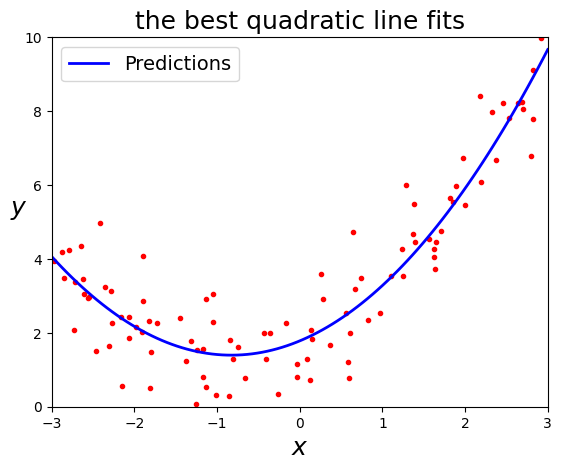

In [52]:
# generating the best fitting line 
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
# plotting the data vs the best line fits
plt.plot(X, y, "r.")
plt.plot(X_new, y_new, "b-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title('the best quadratic line fits', fontsize=18)
plt.show()

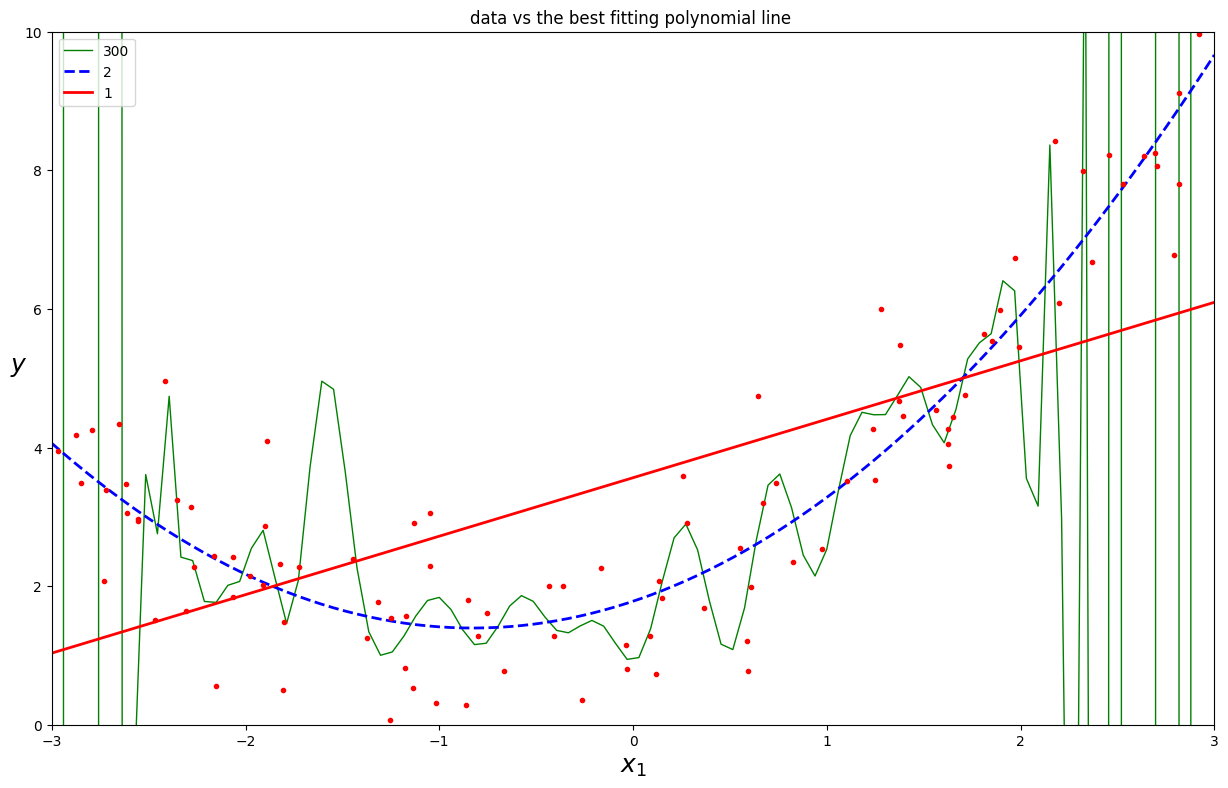

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
plt.figure(figsize=( 15,9))
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-", 2, 1)):
    # initalizing the pipline 
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    # fitting the pipline to the training data
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
# plotting the data vs the best fitting polynomial lines 

plt.plot(X, y, "r.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title('data vs the best fitting polynomial line ')
plt.show()

# Learning Curves

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

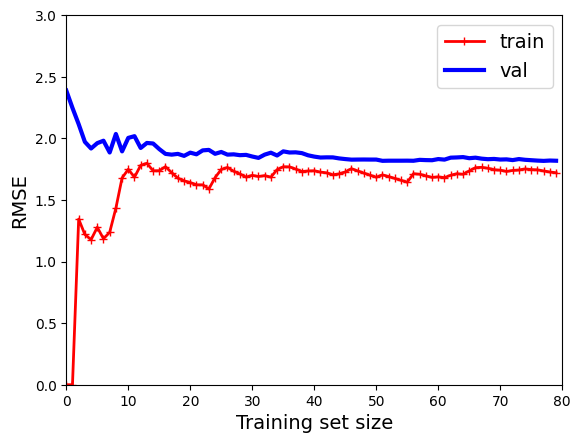

In [55]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()                                      

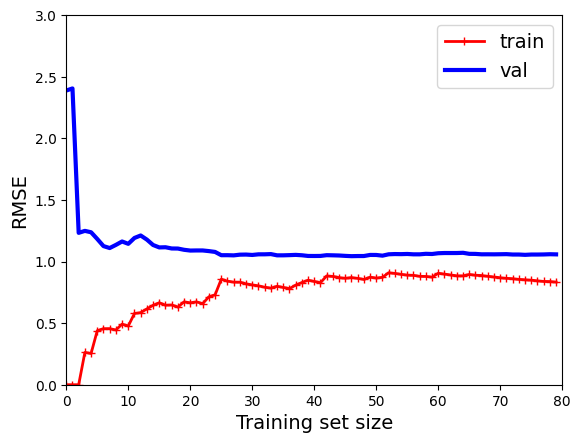

In [56]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

# Regularized Linear Models

#### In both formulas, the objective is to minimize a combination of two terms: 
1. The sum of squared residuals (the difference between observed and predicted values) 
2. A penalty term that shrinks or regularizes the coefficients towards zero.

**mse** : $\frac{1}{n}\sum_{i=1}^{n}(y_{i}-y_{predicted})²$<br><br>
**L1** : $ mse = \frac{1}{n}\sum_{i=1}^{n}(y_{i}-h_{\theta}(x_{i}))² + \lambda\sum_{i=1}^{n}|\theta_{i}|$<br><br>
**L2** : $ mse = \frac{1}{n}\sum_{i=1}^{n}(y_{i}-h_{\theta}(x_{i}))² + \lambda\sum_{i=1}^{n}\theta_{i}^{2}$

*The difference between Ridge and Lasso lies in their penalty terms. Ridge uses a squared sum of coefficients (L2 norm), while Lasso uses an absolute sum of coefficients (L1 norm). This leads to different effects on coefficient shrinkage and variable selection.*

### Ridge Regression

β_ridge represents the coefficients estimated by Ridge regression
- β_ridge = argmin($ Σ(yi - β0 - Σ(xi * βi))^2 + λ * Σ(βi^2) $ )
    - `yi = the observed values of the dependent variable`
    - `xi = the observed values of the independent variables`
    - `β0 = the intercept term`
    - `βi = the coefficients of the independent variables`
    - `λ = the regularization parameter that controls the amount of shrinkage applied to the coefficients`

In [57]:
# generating 20 data points comes from normal disterbution for fitting ridge regression
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

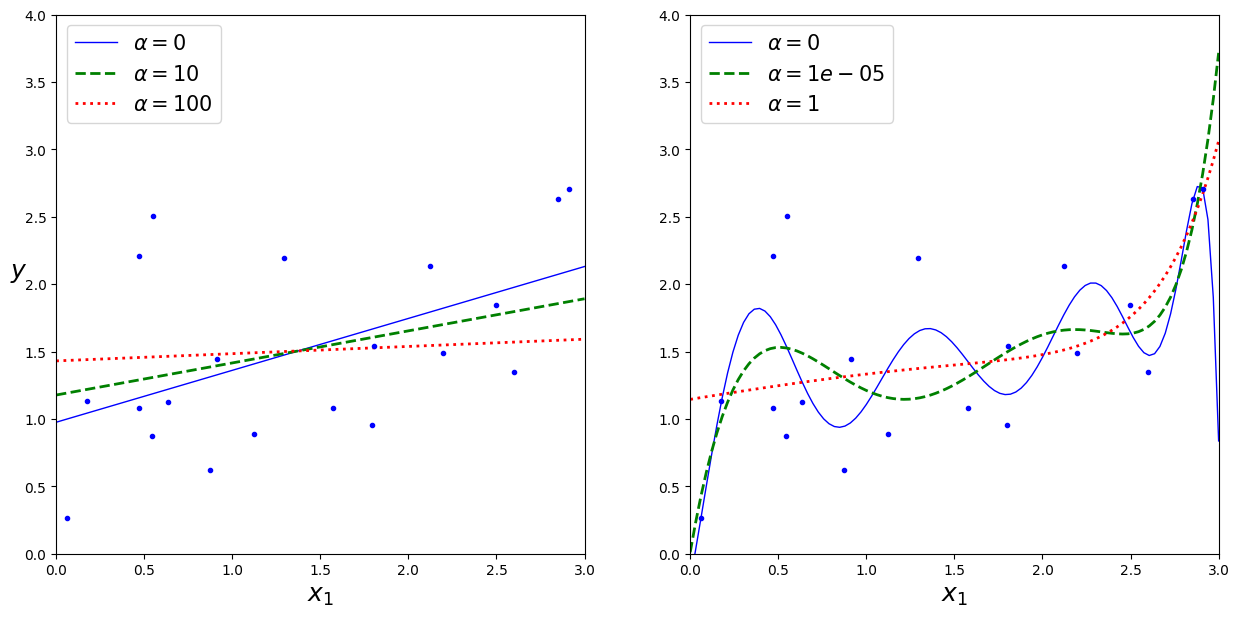

In [58]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):

    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(15,7))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

### Lasso Regression

β_lasso represents the coefficients estimated by Lasso regression
- β_lasso = argmin($ β_lasso = argmin(Σ(yi - β0 - Σ(xi * βi))^2 + λ * Σ|βi|) $ )
    - `yi = the observed values of the dependent variable`
    - `xi = the observed values of the independent variables`
    - `β0 = the intercept term`
    - `βi = the coefficients of the independent variables`
    - `λ = the regularization parameter that controls the amount of shrinkage applied to the coefficients`

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


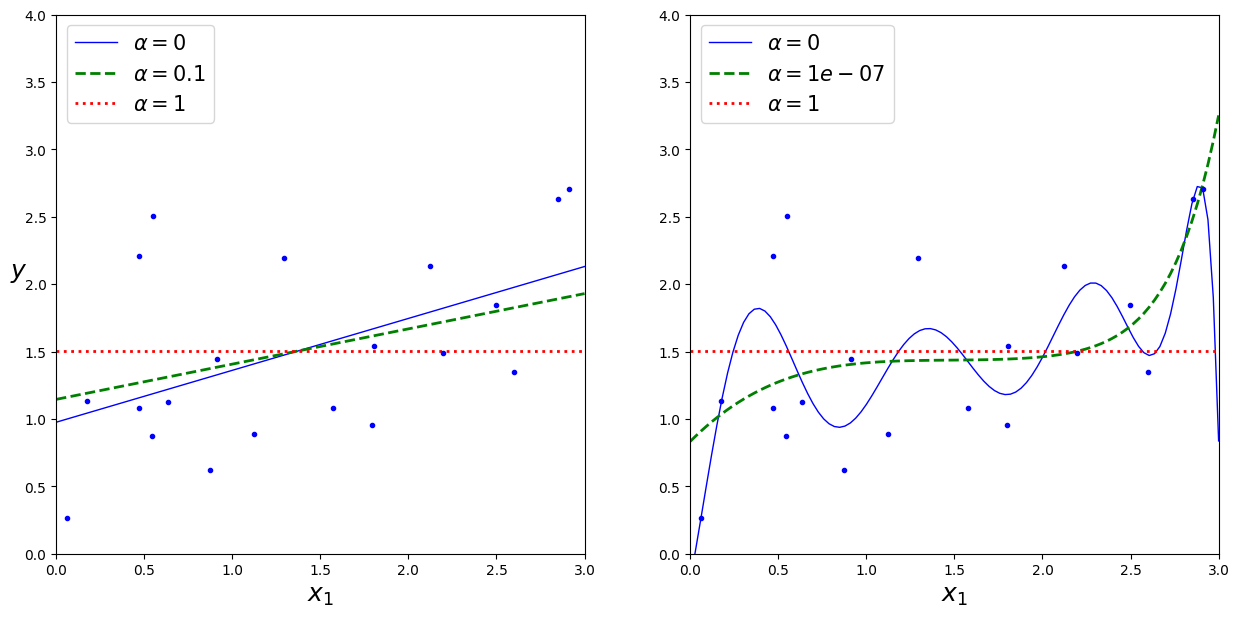

In [59]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(15,7))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

## Lasso VS Ridge

In [44]:
# generating grid plot for lasso and ridge visualization
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)

t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]

Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

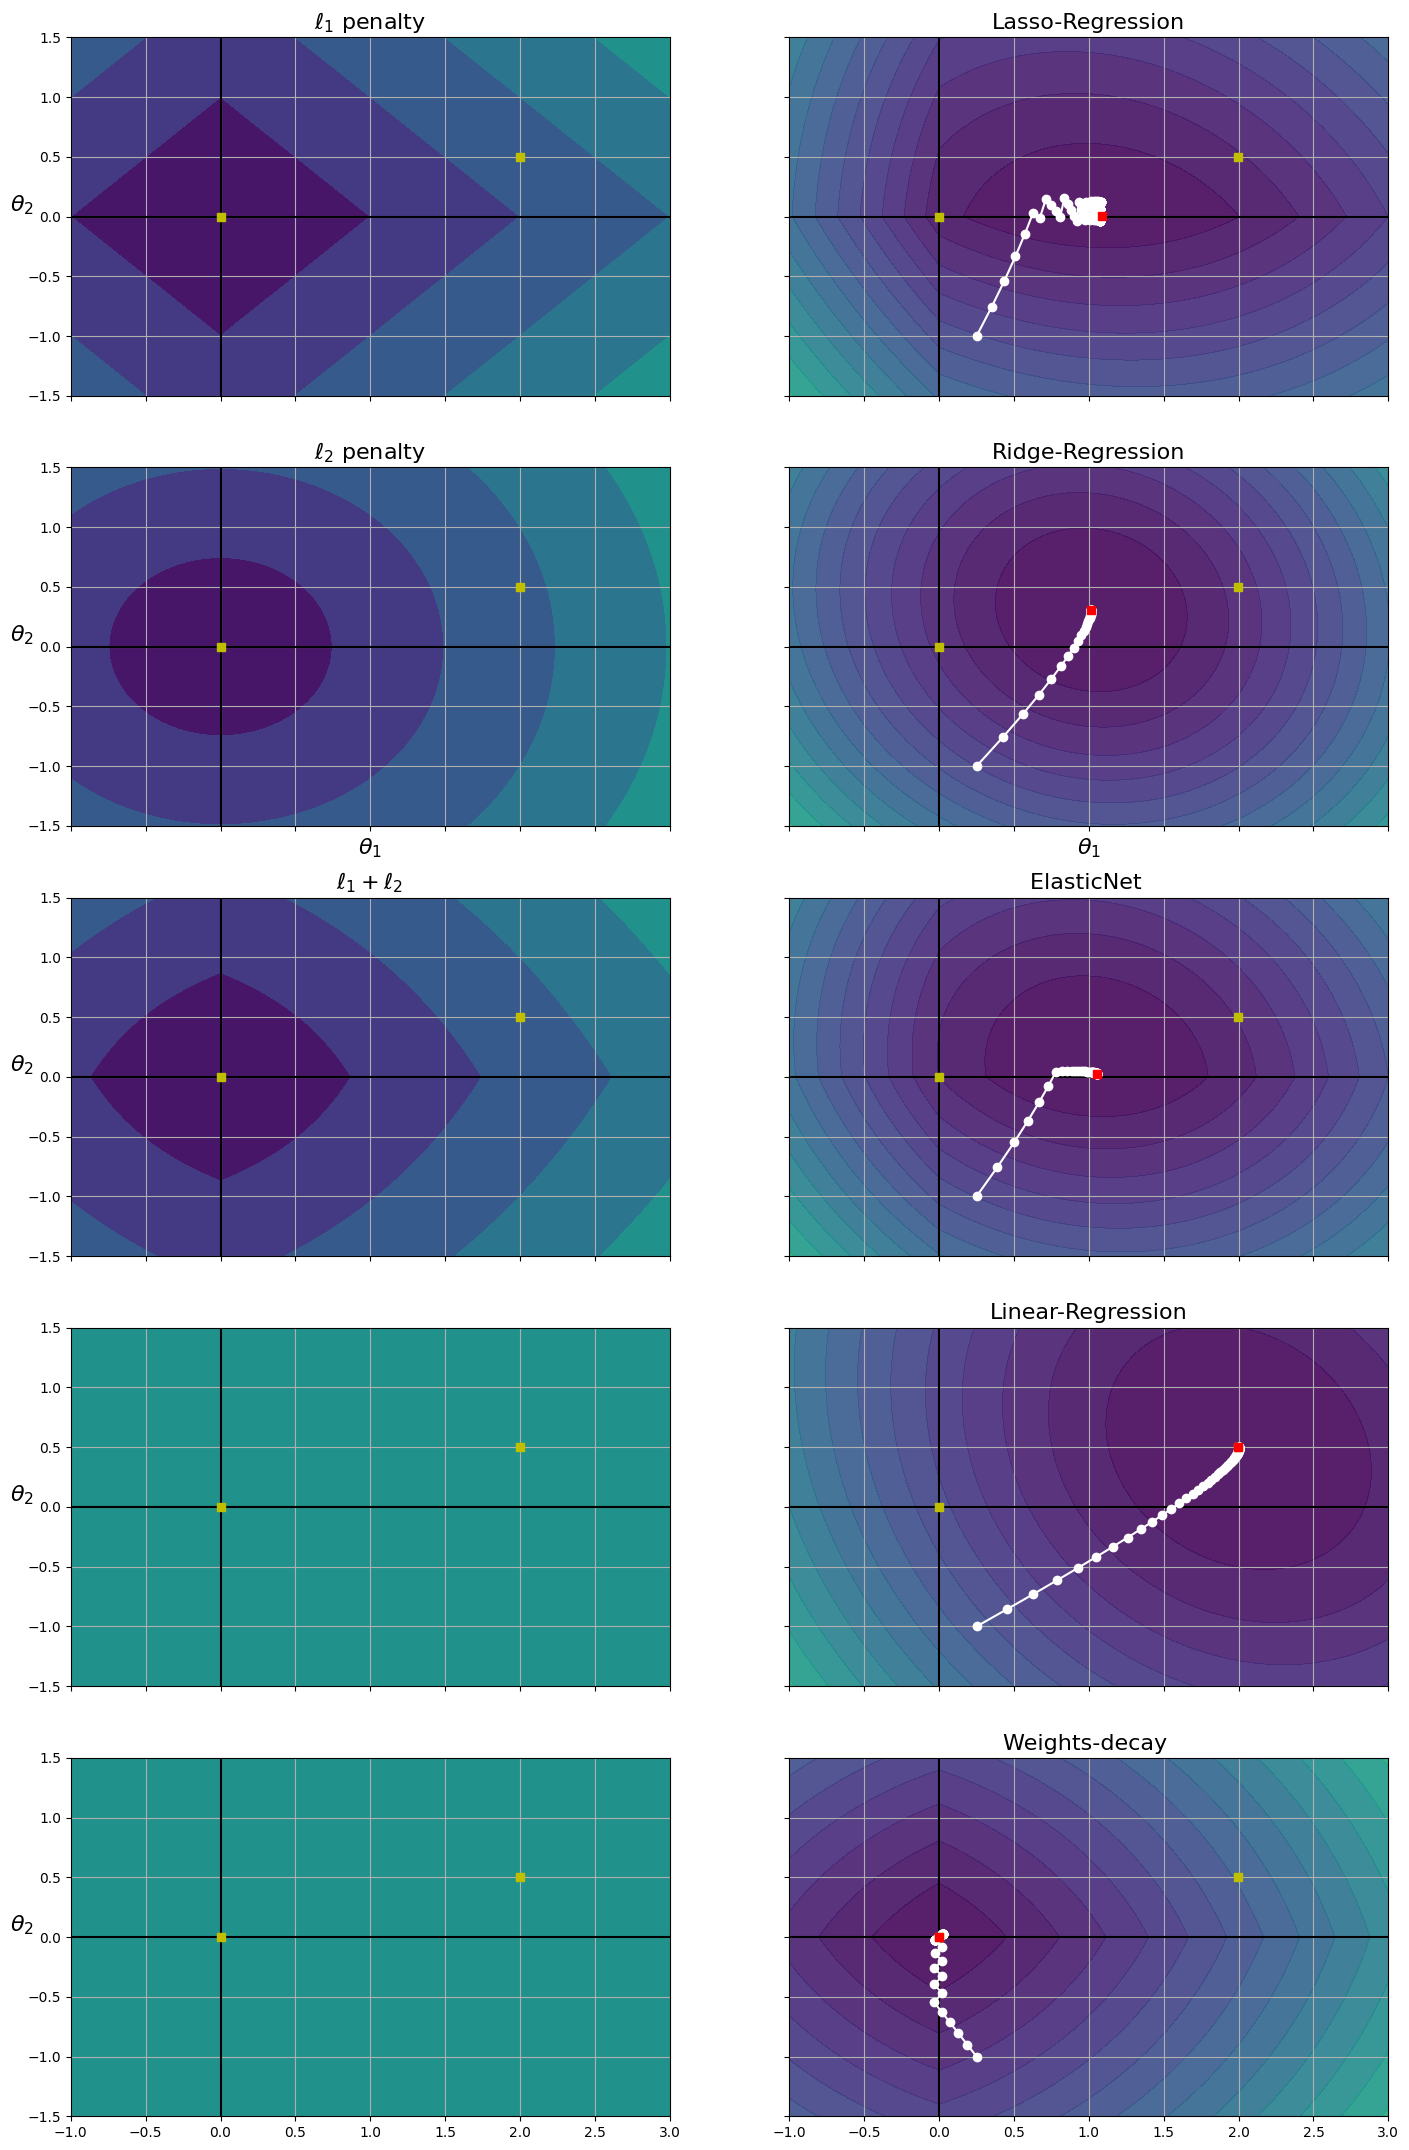

In [45]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 100):
    eta = 0.05
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(17, 27))
for i, N, l1, l2, title, f in ((0, N1, 2., 0, "Lasso-Regression", 1),
                               (1, N2, 0,  2., "Ridge-Regression", 1), 
                               (2, (N1 + N2) / 2 , 1.0,  1.0, "ElasticNet ", 1),
                               (3, np.ones_like(N2), 0,  0, "Linear-Regression", 1), 
                               (4, np.ones_like(N2) , 1.0,  1.0, "Weights-decay ", 0)):
    JR = (J * f) + (l1 * N1) + (l2 * 0.5 * N2**2)
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J  = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2, core = f)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    #ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")

    if i < 2:
        ax.set_title(f"$\ell_{i + 1}$ penalty", fontsize=16)
    if i == 2:
        ax.set_title("$\ell_1 + \ell_2 $ ", fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    #ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()

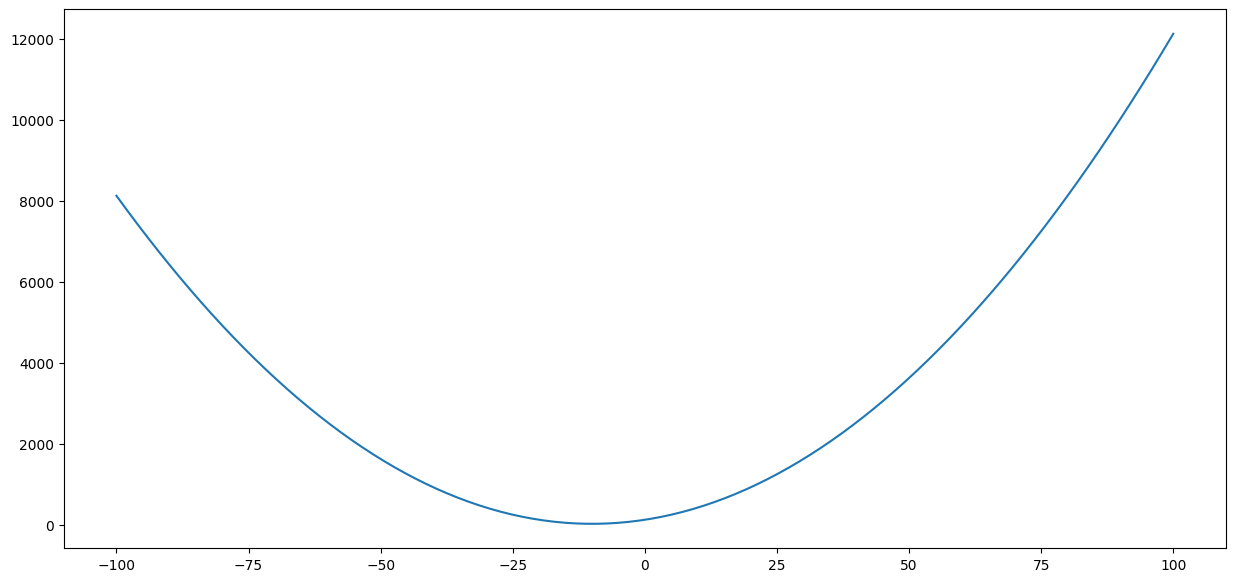

In [46]:
plt.figure(figsize=(15,7))
res_mse = np.linspace(-100, 100, 100)
j_mse = (res_mse + 10) ** 2 + 30
plt.plot(res_mse, j_mse)

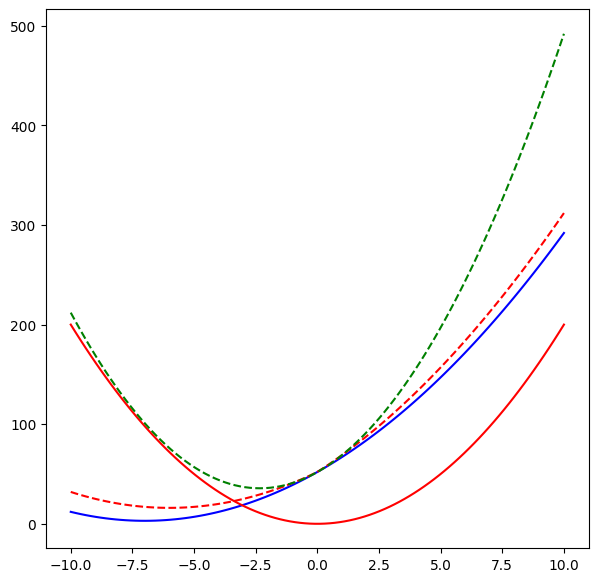

In [47]:
plt.figure(figsize=(7,7))
res_mse = np.linspace(-10, 10, 100)
j_mse = (res_mse + 7) ** 2 + 3
plt.plot(res_mse, j_mse, 'b-')

thetas = np.linspace(-10, 10, 100)
eta = 2
Rl2 = eta * (thetas) ** 2
Rl1 = eta * np.abs(thetas)

jtl2 = Rl2 + j_mse
jtl1 = Rl1 + j_mse

plt.plot(thetas, Rl2, 'r-')
plt.plot(thetas, jtl1, 'r--')
plt.plot(thetas, jtl2, 'g--')


## Overcoming the Effect of Outliers

- We will discuss a Probabilistic Approach to Minimize absolute error loss function (Robust Linear Regression)

First, let's briefly discuss why the OLS method is not robust in the presence of outliers in the dataset.

Consider the "squared average" loss function used in the OLS method.

$L(\vec w) = \displaystyle\sum_{i=1}^{n} (y_i - \vec w^T.\vec x_i)^2$

This squared error loss function arises naturally when we apply the **Maximum Likelihood Estimation (MLE)** approach to estimate the weight vector $\vec w$ by assuming that the target variable y is distributed normally:

$p(y | x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(y - w^T.x)^2}{2\sigma^2}}$

Because of the **Gaussian distribution of the target**, the OLS method (or MLE with Gaussian likelihhod) is not robust to outliers. The Gaussian distribution dies away too quickly (thin tail). Hence, it doesn’t associate any probability to the outliers.


We perform two experients to illustrate the fact that OLS (or MLE with target having Gaussian distribution) doesn't provide a good estimation in presence of outliers.

### Solution : Probabilistic Approach - Robust Linear Regression

- Counter intuitively, let’s assume that there may exist some outliers in our model. Then, use a different distribution that adds probability to the outliers. This distribution should have **heavy tails** (unlike the Gaussian distribution) to accommodate outliers.

- One way to achieve robustness to outliers is to replace the Gaussian distribution for the response variable with a distribution that has heavy tails. Such a distribution will assign higher likelihood to outliers.

One possibility is to use the **Laplace distribution**. It is also known as the double-sided exponential distribution. 
Note that the Laplace distribution dies slowly. 

After using the Laplace likehood, the minimization problem (loss function) becomes:

$ \vec w_{MLE-Laplace} = argmin_{\vec w}\displaystyle\sum_{i=1}^{n} |y_i - \vec w^T.\vec x_i|$

Here, the MLE (Laplace) loss function is:

$L_{MLE-Laplace}(\vec w) = \displaystyle\sum_{i=1}^{n} |y_i - \vec w^T.\vec x_i|$

Hence, Laplace likelihood is equal to the least absolute error (not squared error)! Here we are **penalizing less** for making a mistake. Previously the penalty was large due to the quadratic term.

Thus, we are paying less penalty for the outliers.



Now compare this loss function with the squared error loss function of the MLE (Gaussian) approach.

$L_{MLE-Gaussian}(\vec w) = \displaystyle\sum_{i=1}^{n} (y_i - \vec w^T.\vec x_i)^2$

Notice that the robustness arises from the use of $|y_i - \vec w^t. \vec x_i|$ instead of $(y_i - \vec w^t. \vec x_i)^2$.


### Solution: Non-Probabilistic Approach - Minimize a hybrid of squared error and absolute error loss function (Huber loss function)


An alternative to using Laplace distribution for the likelihood of the data in the presence of outliers, we can use a **non-probabilistic** approach in which we construct a **new loss function** combining the two loss functions that we derived previously using the probabilistic approach.
- Squared error loss function (due to Gaussian likelihood)
- Absolute error loss function (due to Laplace likelihood)

Recall that due to the presence of outliers the squared error loss function penalizes deviations **quadratically** resulting poor line-fitting. In that case we should use absolute error loss function. 

This observation leads us to construct a new loss function that is quadratic for small values of error, and linear for large value. More specifically, it behaves like a squared error loss function when the error (absolute) is less than a small value ($\epsilon$), otherwise it uses the absolute error loss function.

This new function is known as the **Huber loss** function.

$L_H(r, \epsilon) =
  \begin{cases}
    r^2/2       & \quad \text{if } |r| \leq \epsilon\\
    \epsilon|r| - \epsilon^2/2  & \quad \text{if } |r| > \epsilon
  \end{cases}$

Here, $r = y_i - \vec w^t. \vec x_i$

This loss function is equivalent to $l_2$ for errors that are smaller than $\epsilon$, and is equivalent to $l_1$ for larger errors.

Weight Vectors:
 [array([3.02040712]), 4.53683013540083]

Mean squared error: 0.10

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.97


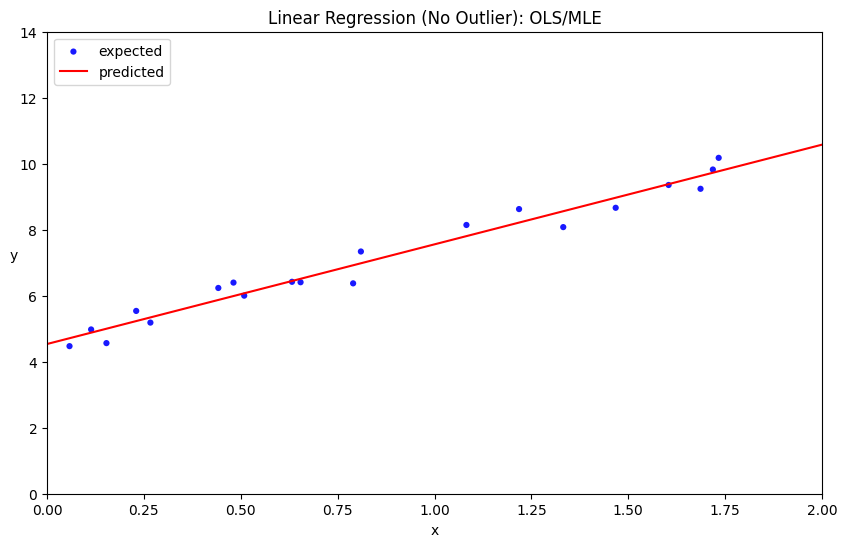

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
# generating 20 sampels with no outliers from normal disterbution 
np.random.seed(43)
m = 20  # no. of training examples
X = 2 *np.random.rand(m,1)
y = 4 + 3*X + np.random.rand(m,1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
w = [lin_reg.coef_[0], lin_reg.intercept_[0]]
print("Weight Vectors:\n", w)
# Make prediction 
y_predicted = X.dot(w[0]) + w[1]
print("\nMean squared error: %.2f" % mean_squared_error(y, y_predicted))

# Explained variance score: 1 is perfect prediction
print("\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y, y_predicted))

X_endpoints = np.array([[0], [2]])
y_endpoints_predicted = X_endpoints.dot(w[0]) + w[1]

# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(X,y,alpha=0.9, c="blue", edgecolors='none', s=20, label="expected")
plt.plot(X_endpoints, y_endpoints_predicted, "r-", label="predicted")
plt.xlim(0,2)
plt.ylim(0,14)
plt.title("Linear Regression (No Outlier): OLS/MLE")
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()

Weight Vectors:
 [array([5.14618741]), 4.076313921427342]

Mean squared error: 14.38

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.40


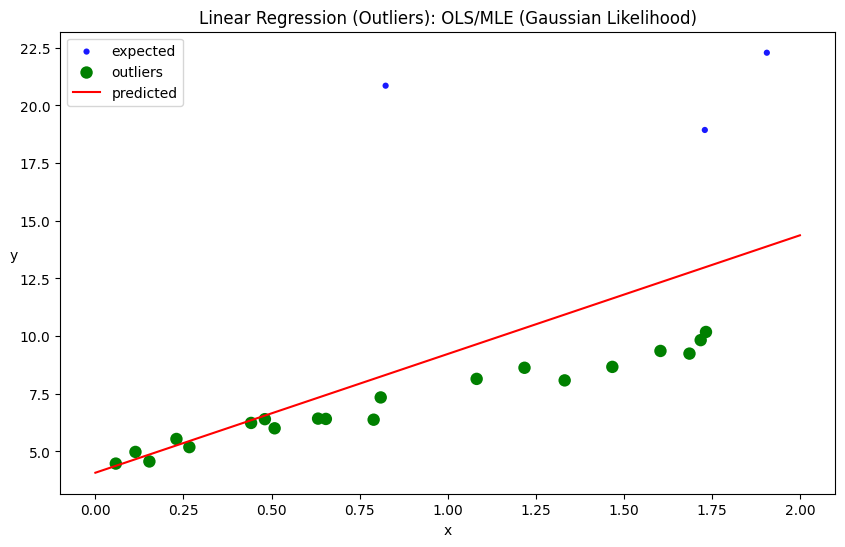

In [49]:
# These are 3 outlier data points 
xo = 2 * np.random.rand(3,1)

# Mix outliers with the dataset
Xt = np.concatenate((X, xo), axis=0)

yo = 15 + xo + 8 * np.random.rand(3,1)

yt = np.concatenate((y, yo), axis=0)

lin_reg = LinearRegression()
lin_reg.fit(Xt, yt)
w = [lin_reg.coef_[0], lin_reg.intercept_[0]]
print("Weight Vectors:\n", w)
# Make prediction 
y_predicted = Xt.dot(w[0]) + w[1]
print("\nMean squared error: %.2f" % mean_squared_error(yt, y_predicted))

# Explained variance score: 1 is perfect prediction
print("\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(yt, y_predicted))

X_endpoints = np.array([[0], [2]])
y_endpoints_predicted = X_endpoints.dot(w[0]) + w[1]

fig = plt.figure(figsize=(10, 6))
plt.scatter(xo,yo,alpha=0.9, c="blue", edgecolors='none', s=20, label="expected")
plt.scatter(X,y,alpha=1.0, c="green", edgecolors='none', s=80, label="outliers")
plt.plot(X_endpoints, y_endpoints_predicted, "r-", label="predicted")
# plt.xlim(0,2)
# plt.ylim(0,14)
plt.title("Linear Regression (Outliers): OLS/MLE (Gaussian Likelihood)")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()

Huber Score:  0.257771124485743

Mean squared error: 17.71

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.26


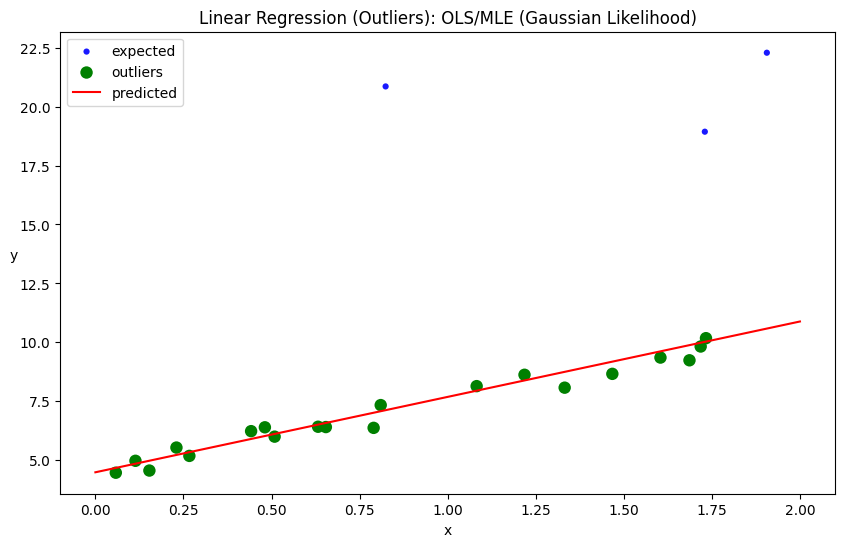

In [50]:
huber = HuberRegressor()
huber.fit(Xt, yt.ravel())

print("Huber Score: ", huber.score(Xt, yt))
# Make prediction 
y_predicted = huber.predict(Xt)
print("\nMean squared error: %.2f"% mean_squared_error(yt, y_predicted))
# Explained variance score: 1 is perfect prediction
print("\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(yt, y_predicted))

X_endpoints = np.array([[0], [2]])

y_endpoints_predicted = huber.predict(X_endpoints)

fig = plt.figure(figsize=(10, 6))
plt.scatter(xo,yo,alpha=0.9, c="blue", edgecolors='none', s=20, label="expected")
plt.scatter(X,y,alpha=1.0, c="green", edgecolors='none', s=80, label="outliers")
plt.plot(X_endpoints, y_endpoints_predicted, "r-", label="predicted")
# plt.xlim(0,2)
# plt.ylim(0,14)
plt.title("Linear Regression (Outliers): OLS/MLE (Gaussian Likelihood)")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()

# Maximum Likelihood Estimation (MLE)

we use MLE to **estimate** the mean and standard deviation (or variance) of a **univariate Gaussian distribution**.


We assume that there are $N$ one-dimensional data points drawn from a Gaussian distribution with a known mean ($\mu$) and variance ($\sigma^2$): $X$= $x_1$, $x_2$, ..., $x_N$ 

- $X \sim \mathcal{N}(\mu, \sigma^2)$

The Probability Density Function (PDF) of this distribution is:

- $p(x_i \rvert \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{1}{2\sigma^2} (x_i - \mu)^2}$


Using MLE, we can learn the two parameters (i.e., mean and variance) of this Gaussian distribution, as follows.

- $\hat{\mu}_{MLE} = \frac{1}{N}\displaystyle\sum_{i=1}^{N} x_i$


- $\hat{\sigma}^2_{MLE} = \frac{1}{N}\displaystyle\sum_{i=1}^{N} (x_i - \hat{\mu}_{MLE})^2$

Mean:  3
STD:  0.8


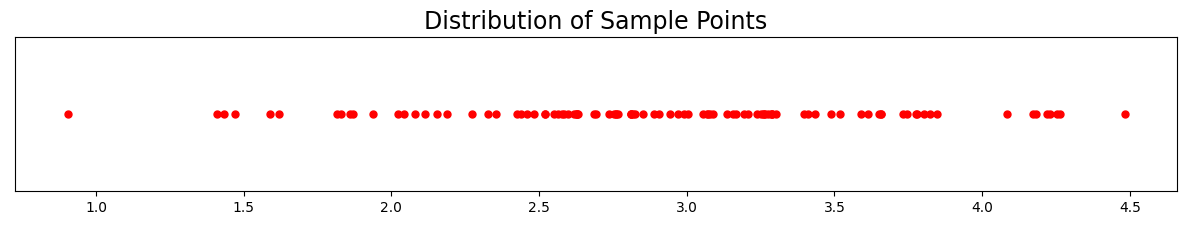

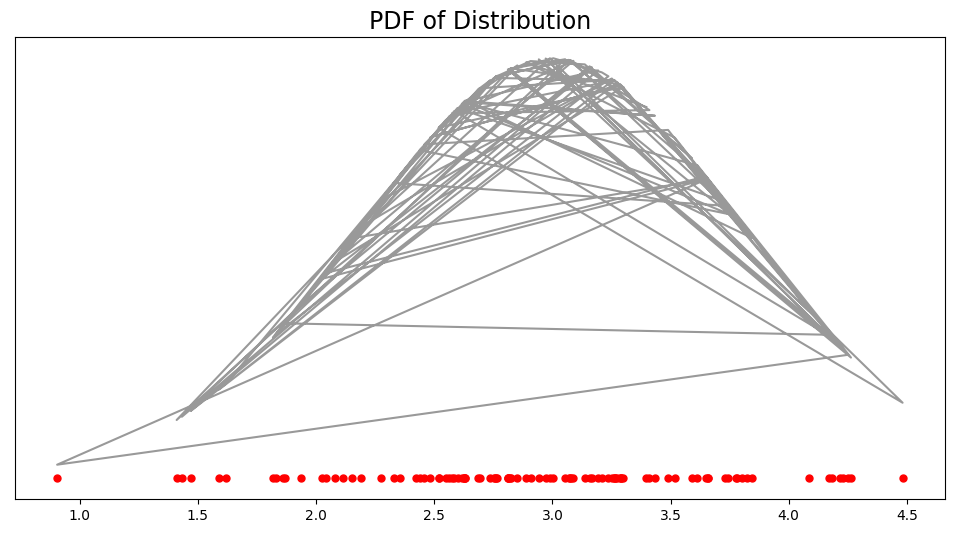

In [51]:
# We generate a set of 1D data points from a Gaussian distribution with a known mean and standard distribution.
np.random.seed(42) # for reproducible random results
#Set Mean and Standard Deviation of the red points
red_mean = 3
red_std = 0.8
numberOfRedPoints = 100
red = np.random.normal(red_mean, red_std, numberOfRedPoints)
print("Mean: ", red_mean)
print("STD: ", red_std)
# Plot the red points
plt.figure(figsize= (15, 2))
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10)
plt.title('Distribution of Sample Points', fontsize=17)
plt.yticks([]); # Doesn't show the y coordinates
plt.show()
# Compute the likelihood of the red and blue distributions by computing respective PDF's
red_likelihood = scipy.stats.norm(red_mean, red_std).pdf(red)
# Plot the PDF of the distributions
plt.figure(figsize=(12, 6))
plt.title('PDF of Distribution', fontsize=17)
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10)
plt.plot(red, red_likelihood, color='k', alpha=0.4)
plt.yticks([])
plt.show()

In [52]:
def estimate_mean(data):
    return np.sum(data) / len(data)

def estimate_std(data, mean):
    variance = np.sum((data - mean)**2) / len(data)
    return np.sqrt(variance)

Estimated Mean:  2.9169227860847244
Actual Mean:  3

Estimated STD:  0.7228929413157037
Actual STD:  0.8


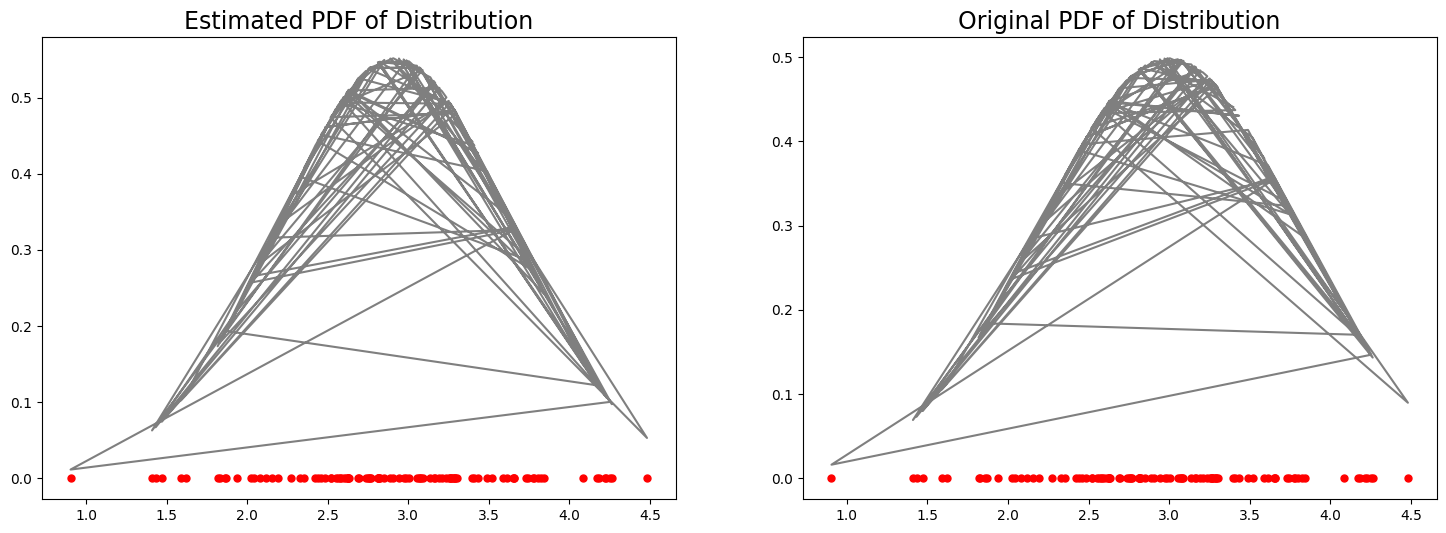

In [53]:
# MLE Mean
red_mean_estimated = estimate_mean(red)
# MLE STD
red_std_estimated = estimate_std(red,red_mean_estimated)

print("Estimated Mean: ", red_mean_estimated)
print("Actual Mean: ", red_mean)

print("\nEstimated STD: ", red_std_estimated)
print("Actual STD: ", red_std)

# Compute the likelihood of each data point appearing under the estimated parameters
red_likelihood_estimated = scipy.stats.norm(red_mean_estimated, red_std_estimated).pdf(red)
# Plot the PDF of the distributions
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.title('Estimated PDF of Distribution', fontsize=17)
plt.plot(red, red_likelihood_estimated, color='k', alpha=0.5)
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10)

plt.subplot(122)
plt.title('Original PDF of Distribution', fontsize=17)
plt.plot(red, red_likelihood, color='k', alpha=0.5)
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10)

plt.show()

## Early Stopping

In [54]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [55]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
        ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
# code for learning a 1000 epochs while saving the best model and the best epoch
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        # saving the best model
        best_model = deepcopy(sgd_reg) 

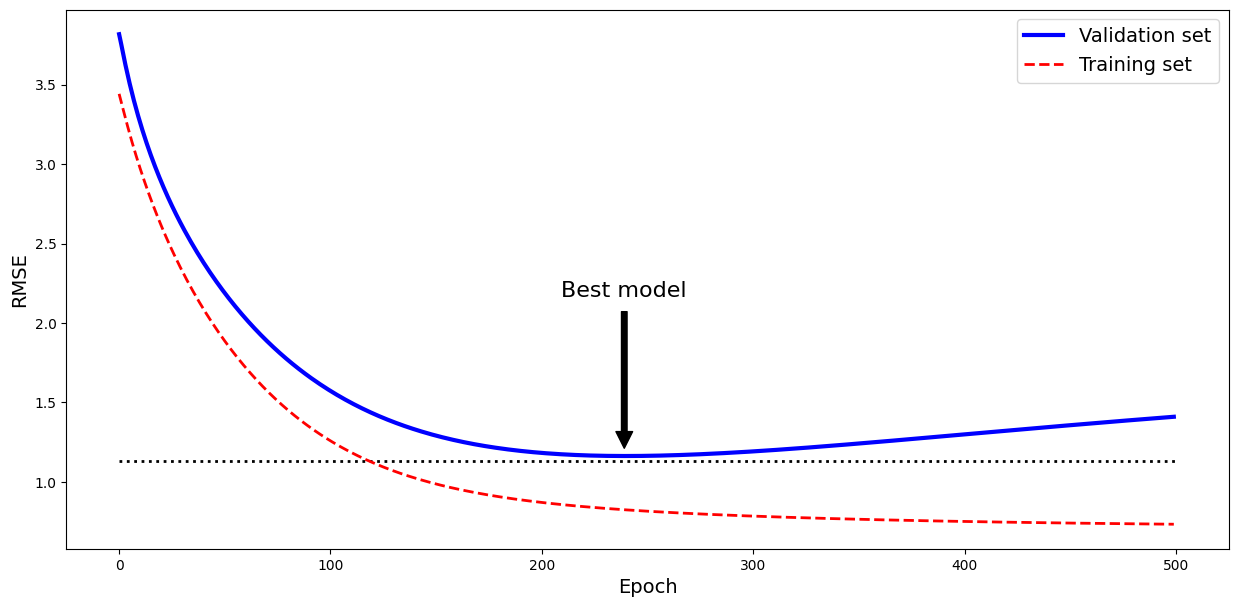

In [56]:
# fitting the data for 500 epoch for visualizing
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict   = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(15,7))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [57]:
print(f"the best model happens at {best_epoch}th epoch \nwhile the best model is: \n{best_model}")

the best model happens at 239th epoch 
while the best model is: 
SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)
